In [4]:
# !pip install tensorflow opencv-python matplotlib

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/5b/6f/8b125d126d54061c0be610b135aaf2f8960f55c2e185ac32445e4a5012d5/tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/38/ba/dd4d998a852451e98dc009ecb208bbb0eeb0c8252dc35b7c4e1050762b36/tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.13.0-cp38-cp38-win_amd64.whl (1.9 kB)
Using cached tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl (276.5 MB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\admin\\anaconda3\\envs\\general_func\\Lib\\site-packages\\tensorflow\\include\\absl\\synchronization\\barrier.h'
Consider using the `--user` option or check the permissions.



In [12]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
import cv2
import imghdr

In [8]:
data_dir = 'data'

In [10]:
image_exts = ['jpeg', 'jpg', 'bmp','png']

In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

Image not in ext list data\not_stop\152.jpg
Image not in ext list data\not_stop\160.jpg
Image not in ext list data\not_stop\193.jpg


In [15]:
img = cv2.imread(os.path.join(data_dir, 'not_stop', '101.jpg'))

In [19]:
img.shape

(1080, 1920, 3)

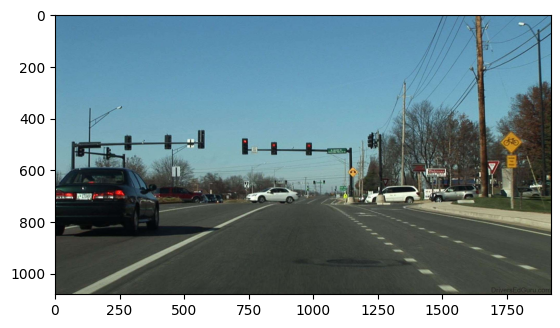

In [26]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Loading Data

In [27]:
cv2??

In [28]:
import numpy as np

In [36]:
tf.keras.utils.image_dataset_from_directory('data')

Found 194 files belonging to 2 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [37]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 194 files belonging to 2 classes.


In [38]:
data.as_numpy_iterator()

In [ ]:
data_iterator = data.as_numpy_iterator()

In [39]:
data_iterator.next()

(array([[[[ 84.200714 , 103.88431  ,  55.10907  ],
          [ 81.69348  ,  99.42395  ,  61.27011  ],
          [106.65744  , 122.8176   ,  93.139435 ],
          ...,
          [ 18.518341 ,  23.518341 ,  19.518341 ],
          [ 17.429688 ,  21.429688 ,  20.429688 ],
          [ 17.       ,  21.       ,  20.       ]],
 
         [[ 98.624084 , 119.856964 ,  60.69049  ],
          [ 86.59158  , 105.642365 ,  60.01288  ],
          [102.479126 , 119.775665 ,  84.987274 ],
          ...,
          [ 18.       ,  23.       ,  19.       ],
          [ 17.429688 ,  21.429688 ,  20.429688 ],
          [ 17.       ,  21.       ,  20.       ]],
 
         [[103.60547  , 126.82541  ,  57.192932 ],
          [ 89.94565  , 110.31674  ,  56.637726 ],
          [ 98.8988   , 116.51599  ,  78.44568  ],
          ...,
          [ 17.199219 ,  22.199219 ,  18.199219 ],
          [ 17.085602 ,  21.085602 ,  20.085602 ],
          [ 16.580841 ,  20.580841 ,  19.580841 ]],
 
         ...,
 
         [[ 

In [46]:
batch = data_iterator.next()

In [47]:
batch[0].shape

(32, 256, 256, 3)

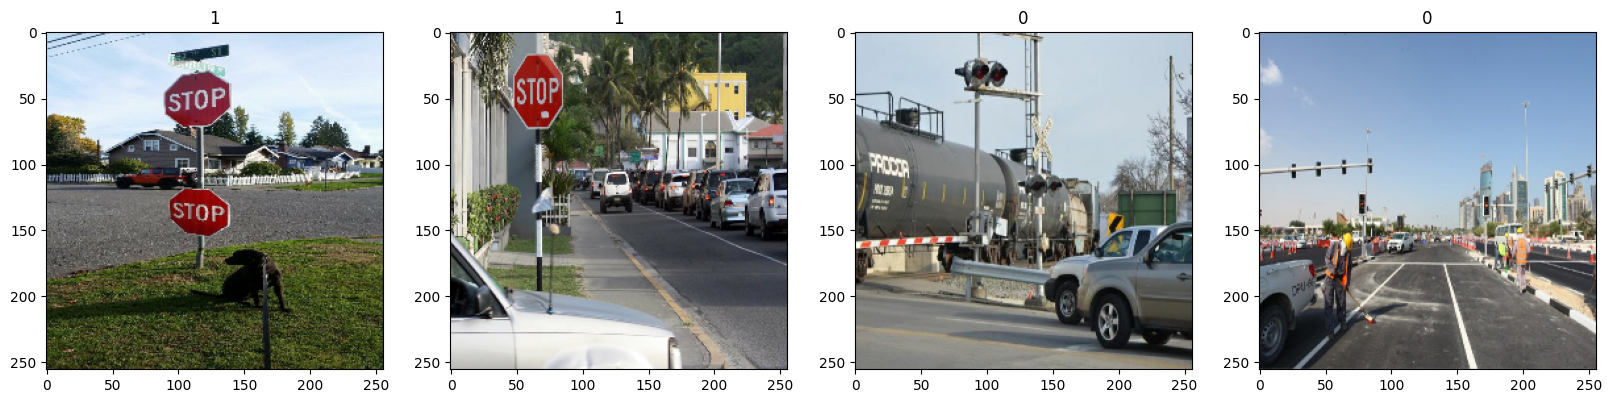

In [53]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocess the data

In [50]:
data = data.map(lambda x,y: (x/255, y))

In [57]:
scaled_iterator = data.as_numpy_iterator()

In [58]:
batch = scaled_iterator.next()

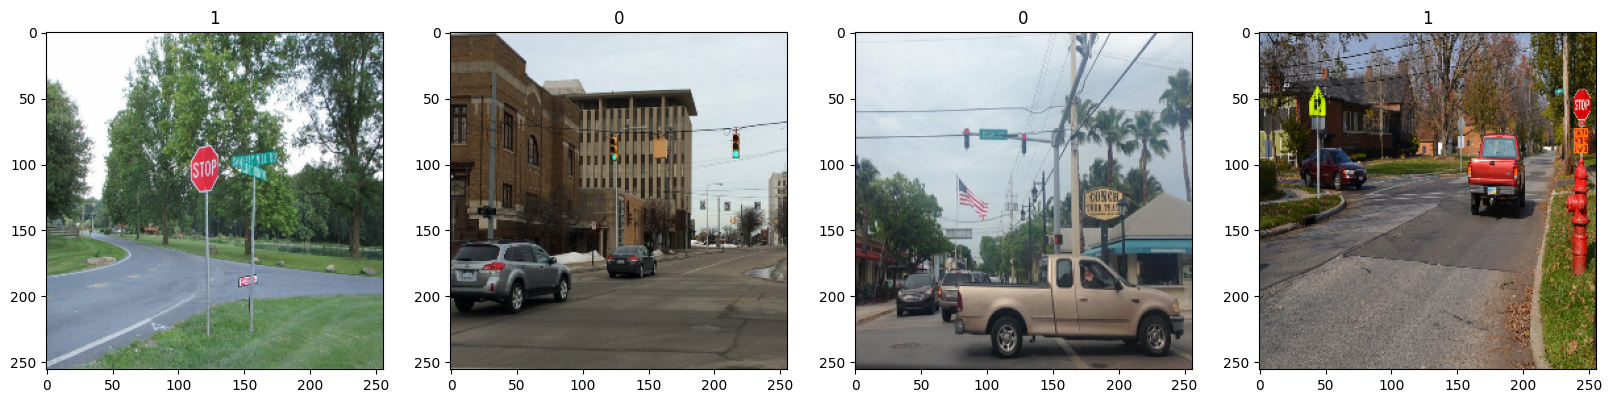

In [60]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## Split Data

In [65]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [67]:
test_size+val_size+train_size

7

In [68]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [69]:
len(train)

4

In [70]:
len(val)

2

In [71]:
len(test)

1

In [77]:
test.as_numpy_iterator().next()[0][0].shape

(256, 256, 3)

## Bulding deep learning model

In [166]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [167]:
model = Sequential()

In [168]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [169]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [170]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)      

## Training Model

In [171]:
logdir = 'logs'

In [172]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [173]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 8s 1s/step - loss: 0.7493 - accuracy: 0.5312 - val_loss: 0.6894 - val_accuracy: 0.4688
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 0.6824 - accuracy: 0.5859 - val_loss: 0.6502 - val_accuracy: 0.8125
Epoch 3/20
4/4 [==============================] - 7s 1s/step - loss: 0.6547 - accuracy: 0.6406 - val_loss: 0.5932 - val_accuracy: 0.7812
Epoch 4/20
4/4 [==============================] - 7s 1s/step - loss: 0.5599 - accuracy: 0.7656 - val_loss: 0.5374 - val_accuracy: 0.7188
Epoch 5/20
4/4 [==============================] - 6s 1s/step - loss: 0.4966 - accuracy: 0.7578 - val_loss: 0.4467 - val_accuracy: 0.8281
Epoch 6/20
4/4 [==============================] - 7s 2s/step - loss: 0.3938 - accuracy: 0.8281 - val_loss: 0.3893 - val_accuracy: 0.8438
Epoch 7/20
4/4 [==============================] - 7s 2s/step - loss: 0.3512 - accuracy: 0.8750 - val_loss: 0.2851 - val_accuracy: 0.8906
Epoch 8/20
4/4 [=========================

In [174]:
history.history

{'loss': [0.74928879737854,
  0.6823713779449463,
  0.6546883583068848,
  0.5598582625389099,
  0.496634840965271,
  0.39376387000083923,
  0.35122767090797424,
  0.26678577065467834,
  0.21468782424926758,
  0.1315828263759613,
  0.16611221432685852,
  0.1260184645652771,
  0.0678955465555191,
  0.04693577066063881,
  0.03322935104370117,
  0.01576695218682289,
  0.00978397112339735,
  0.009673211723566055,
  0.0071689672768116,
  0.007032683119177818],
 'accuracy': [0.53125,
  0.5859375,
  0.640625,
  0.765625,
  0.7578125,
  0.828125,
  0.875,
  0.8984375,
  0.9296875,
  0.9609375,
  0.9375,
  0.96875,
  0.984375,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.6893532872200012,
  0.6501731872558594,
  0.5932470560073853,
  0.5374076962471008,
  0.44670650362968445,
  0.38931190967559814,
  0.285125195980072,
  0.25270140171051025,
  0.1178547665476799,
  0.11266392469406128,
  0.07334330677986145,
  0.08470235764980316,
  0.04018247872591019,
  0.02986732684075832

## Performance

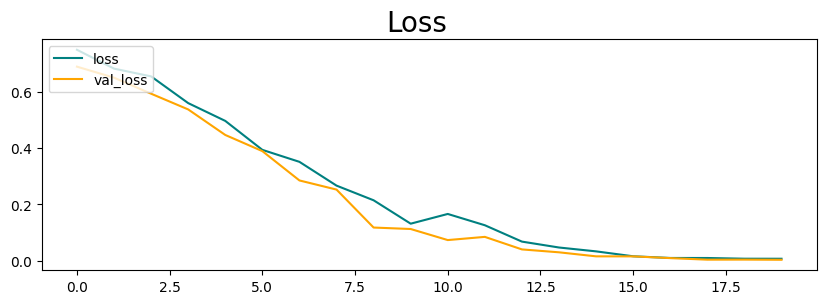

In [175]:
fig = plt.figure(figsize=(10,3))
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

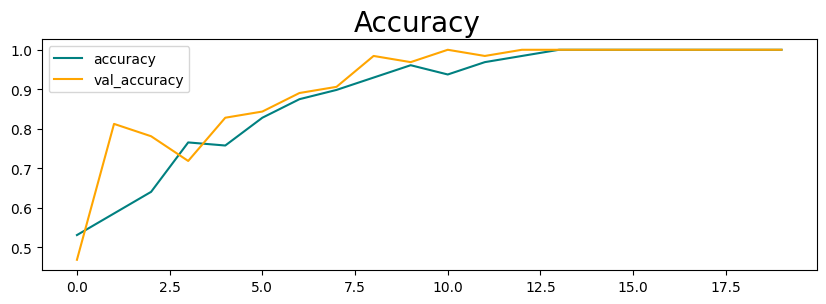

In [176]:
fig = plt.figure(figsize=(10,3))
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluating Performance

In [177]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [178]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [179]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 135ms/step


In [180]:
print(f'Precision {pre.result()}, Recall {re.result()}, Accuracy {acc.result()}')

Precision 1.0, Recall 1.0, Accuracy 1.0


## Test

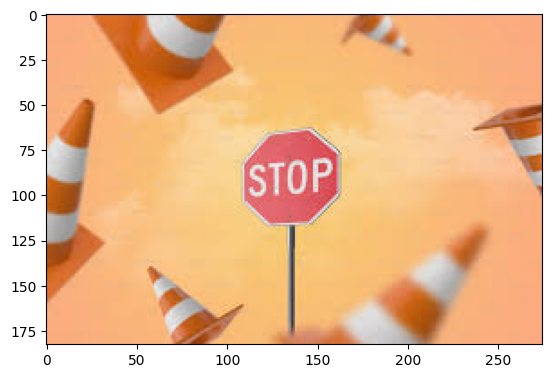

In [181]:
img = cv2.imread('Stop_Test_Image.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

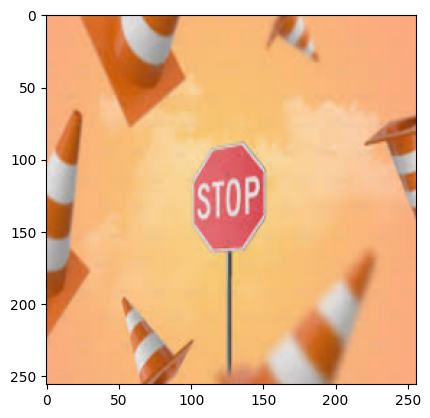

In [182]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [183]:
resize.shape

TensorShape([256, 256, 3])

In [184]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [185]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 40ms/step


In [211]:
if yhat > 0.5:
    print("Stop")
else:
    print("Not Stop")

Stop


## Saving the Model

In [189]:
model.save(os.path.join('Model','Stop_NotStop_Sign_Classifier.keras'))

In [190]:
from tensorflow import keras

In [202]:
loaded_model = keras.models.load_model(os.path.join('Model','Stop_NotStop_Sign_Classifier.keras'))

In [207]:
yhat = loaded_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 36ms/step


In [212]:
yhat = loaded_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 36ms/step


In [210]:
yhat

array([[1.]], dtype=float32)

In [209]:
model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 46ms/step


array([[1.]], dtype=float32)